# Probability Concept Functions

In this notebook, I am solving the equations of the alternative velocity profile proposed by Chiu and Hsu (2006). The data replicated here are from Chiu and others (2002).

Chiu, C., & Tung, N. (2002). Maximum Velocity and Regularities in Open-Channel Flow, 128(4), 390–398.

Chiu, C.-L., & Hsu, S.-M. (2006). Probabilistic approach to modeling of velocity distributions in fluid flows. Journal of Hydrology, 316(1–4), 28–42. https://doi.org/10.1016/j.jhydrol.2005.04.011

In [6]:
import math
import numpy as np

def phi2M(phi,M=0):
    """Return M from a given phi"""
    while True:
        M += 0.01
        fn = (math.exp(M)/(math.exp(M)-1))-(1/M)
        if fn >= phi:
            break
    return M


def uD2umax(uD,M,hD):
    """Return umax from surface uD velocity"""
    umax = uD * M / math.log(1+(math.exp(M))*(1/(1-hD))*math.exp(1-(1/(1-hD))))
    return umax
    

def umax2uprofile(umax,M,D,h,num_points_profile=20):
    """Return a velocity profile"""
    yi = np.linspace(0, D, num=num_points_profile)
    ui = np.zeros(np.size(yi))
    for i in range(num_points_profile):
        ui[i] = (umax/M)*math.log(1+(math.exp(M)-1)*(yi[i]/(D-h))*math.exp(1-(yi[i]/(D-h))))
    return yi, ui
    



In [7]:
"""Flood test data from Chiu and others 2002"""

prof1_y = [0.11278094,0.15873662,0.30859467, 0.21040516, 0.4061657, 1.0053785, 1.5130191, 1.77]
prof1_u = [0.4406258, 0.47062486, 0.48104006, 0.50985247, 0.55949396, 0.63921696, 0.6001184, 0.5805731] 

prof2_y = [0.10759347, 0.1591423, 0.20515783, 0.3088873, 0.40119767, 0.5105203, 1.0122286, 1.12]
prof2_u = [0.34027857, 0.4002674, 0.41988584, 0.4302904, 0.4210845, 0.4614788, 0.45121393, 0.43047932] 

prof3_y = [0.107214384, 0.15827772, 0.20389421, 0.30157164, 0.4053011, 0.5841026, 1.0046269, 1.5063086, 2.0077507, 2.5153716, 2.6]
prof3_u = [0.40602243, 0.5502095, 0.63903207, 0.69903153, 0.70943606, 0.7002501, 0.7695513, 0.76390004, 0.7997712, 0.7641328, 0.73416567] 

Flood 1 umax: 0.6232039459739117
Flood 2 umax: 0.46208973259002584
Flood 3 umax: 0.7880749864520256


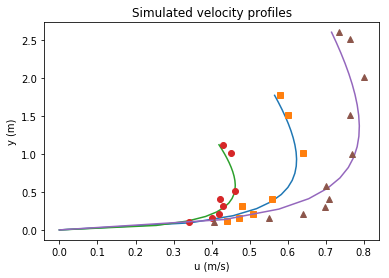

In [8]:
import matplotlib.pyplot as plt
    
phi = 0.7 
hD = 0.48
M = 0

"""Flood 1: 12/16/78"""
uD1 = 0.5806
D1 = 1.77
h1 = 0.8496

M = phi2M(0.7)
umax = uD2umax(uD1,M,hD)
print('Flood 1 umax: {0}'.format(umax))
yi1,ui1 = umax2uprofile(umax,M,D1,h1)

"""Flood 2: 3/1/79"""
uD2 = 0.4305
D2 = 1.12
h2 = 0.5376

M = phi2M(0.7)
umax = uD2umax(uD2,M,hD)
print('Flood 2 umax: {0}'.format(umax))
yi2,ui2 = umax2uprofile(umax,M,D2,h2)

"""Flood 3: 4/12/79"""
uD3 = 0.7342
D3 = 2.60
h3 = 1.248

M = phi2M(0.7)
umax = uD2umax(uD3,M,hD)
print('Flood 3 umax: {0}'.format(umax))
yi3,ui3 = umax2uprofile(umax,M,D3,h3)



plt.plot(ui1,yi1)
plt.xlabel('u (m/s)')
plt.ylabel('y (m)')
plt.title('Simulated velocity profiles')
plt.hold
plt.plot(prof1_u,prof1_y,'s')
plt.plot(ui2,yi2)
plt.plot(prof2_u,prof2_y,'o')
plt.plot(ui3,yi3)
plt.plot(prof3_u,prof3_y,'^')
plt.show()